In [78]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [79]:
# Define output path. Create the output folder if it does not exisit 
output_path = 'output/models/'

import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [80]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [81]:
# import patient list
f = open("../Preoperative Prediction/output/models/patient_list.txt", "r")

In [82]:
# create aptient list
patient_list = f.read().splitlines()
f.close()

In [83]:
df = df[df['PATIENTNUMBER'].isin(patient_list)].copy()

In [84]:
# Exploring outcome of intrest
print("Unique values for tumour type {}".format(df['PATHOLOGY'].unique()))
print("Number of patients with tumour type missing {}".format(sum(df['PATHOLOGY'].isnull())))
print("Distribution of tumor type \n{}".format(df['PATHOLOGY'].value_counts()))

Unique values for tumour type ['Malign' 'Benign']
Number of patients with tumour type missing 0
Distribution of tumor type 
Malign    1333
Benign     294
Name: PATHOLOGY, dtype: int64


In [85]:
# drop records with no target variable
df = df[df['SURGICALMARGIN'].notnull()].copy()

In [86]:
# Encode the target variable
df['SURGICALMARGIN'] = df['SURGICALMARGIN'].map({'Positive':1,'Negative':0}).copy()

In [87]:
df_ori = df.copy()

In [88]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 1627
Number of variables in Combined dataset 161


In [89]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [90]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 161 columns):
PATIENTNUMBER                         1627 non-null object
PROCNAME                              1627 non-null object
CENTERCODE                            1627 non-null object
SURGEONCODE                           674 non-null object
RECPROGRESS                           1627 non-null object
CREATEDDATE                           1627 non-null object
GENDER                                1627 non-null object
DATEOFBIRTH                           1215 non-null float64
AGEATSURGERY                          1625 non-null float64
MARITALSTATUS                         1484 non-null object
RACE                                  1462 non-null object
EDUCATION                             1425 non-null object
WEIGHT                                1495 non-null float64
HEIGHT                                1493 non-null float64
BMI                                   1515 non-null float64
CLI

In [91]:
# Exploring outcome of intrest
print("Unique values for tumour type {}".format(df['SURGICALMARGIN'].unique()))
print("Number of patients with tumour type missing {}".format(sum(df['SURGICALMARGIN'].isnull())))
print("Distribution of tumor type \n{} \n{}".format(df['SURGICALMARGIN'].value_counts(), round(df['SURGICALMARGIN'].value_counts(normalize=True),2)))

Unique values for tumour type [0 1]
Number of patients with tumour type missing 0
Distribution of tumor type 
0    1566
1      61
Name: SURGICALMARGIN, dtype: int64 
0    0.96
1    0.04
Name: SURGICALMARGIN, dtype: float64


### Define numeric columns and identify missing values

In [92]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
'ISCHEMIATIMEmin',
'OPERATIVETIMEmin'
] 

### Define Categorical columns

In [93]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',

'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
#'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [94]:
post_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
#'PRIMARYSURGEON',
'OPERATIVETIMEmin',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'ISCHEMIATIMEmin',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails', # too many values
'LYMPHNODEDISSECTIONLND',
'BLOODLOSSml',
'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS', too many values
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'CLAVIENGRADE',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'MULITIFOCALITY',
    
'SURGICALMARGIN'
]

### Data Cleaning

In [95]:
#clean Clavien grade
df['CLAVIENGRADE'] = df['CLAVIENGRADE'].map(lambda x: str(x).split(':')[0])

In [96]:
df['CLAVIENGRADE'].value_counts()

Grade 0    1181
nan         310
Grade 1      77
Grade 2      31
Grade 3      26
Grade 4       2
Name: CLAVIENGRADE, dtype: int64

In [97]:
# Clean Surgical and Non- Surgical Complications
df['SURGICALCOMPLICATIONS'] = df['SURGICALCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])
df['NONSURGICALCOMPLICATIONS'] = df['NONSURGICALCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])
print(df['SURGICALCOMPLICATIONS'].unique())
print(df['NONSURGICALCOMPLICATIONS'].unique())

['320' '314' 'nan' '318' '316' '314315320' '317' '319']
['321' 'nan' '324326' '323']


In [98]:
# function to clean operative time which contains a mix of time and numeric data i.e. '2:30' & '120.6'
def clean_oprerative_time(t):
    if ':' in t:
        x = float(t.split(':')[0])*60 + float(t.split(':')[1])
    else:
        x = float(t)
    return x

# clean operative time 
df['OPERATIVETIMEmin'] = df['OPERATIVETIMEmin'].map(lambda x: clean_oprerative_time(str(x)))

In [99]:
# Clean INTRAOPCOMPLICATIONS consider first code as primary complication
df['INTRAOPCOMPLICATIONS'] = df['INTRAOPCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])

In [100]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [101]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,SURGICALMARGIN,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year
count,1215.00,1625.00,1495.00,1493.00,1515.00,1585.00,1547.00,1423.00,1598.00,1603.00,1458.00,1615.00,94.00,1319.00,89.00,1439.00,1464.00,1607.00,1553.00,1537.00,1594.00,693.00,856.00,1063.00,806.00,559.00,384.00,422.00,570.00,400.00,328.00,290.00,297.00,474.00,269.00,281.00,1624.00,1611.00,1085.00,471.00,1422.00,999.00,1257.00,1627.00,1427.00,1101.00,1626.00
mean,1956.92,56.89,88.37,163.84,27.64,33.79,1.25,3.30,18.31,45.54,6829.80,2.17,622.25,80.82,871.67,8.45,1.91,1.04,174.52,20.36,193.09,58.43,68.28,31.16,120.19,2419.53,170.40,169.81,107.95,225.42,3113.58,239.53,278.82,135.84,297.29,3182.63,4.55,13.04,78.34,207.10,157.09,17.91,0.19,0.04,0.79,17.04,2014.02
std,13.22,12.80,48.76,40.74,4.91,44.47,1.79,2.15,65.09,87.20,2211.29,35.11,460.01,18.65,297.65,1.74,0.83,0.26,74.31,37.72,223.73,207.24,183.90,170.59,217.28,4595.13,360.86,341.49,308.74,354.31,5273.99,417.01,423.55,341.39,405.38,4379.96,34.99,29.11,261.84,396.21,361.28,153.92,0.39,0.19,26.45,20.70,2.99
min,1925.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,10.00,0.34,4.00,0.40,35.00,34.00,43.50,2.00,1.00,0.00,24.00,0.00,0.00,7.50,0.28,0.46,16.84,5.20,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,4.70,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,0.00,2006.00
25%,1948.00,48.00,68.50,160.00,24.17,22.00,0.00,2.00,13.10,37.70,5600.00,0.79,77.50,67.08,999.00,7.00,1.00,1.00,132.00,14.00,50.00,11.10,32.10,1.00,53.00,9.60,10.80,30.30,0.90,51.00,9.30,10.80,30.90,0.90,56.00,9.60,2.00,2.60,1.00,2.00,2.00,0.00,0.00,0.00,0.00,3.00,2012.00
50%,1956.00,58.00,79.00,169.00,26.89,30.00,1.00,3.00,14.00,41.60,6800.00,0.90,999.00,80.19,999.00,8.00,2.00,1.00,162.00,18.00,100.00,12.40,36.00,1.00,66.00,12.30,12.20,35.50,1.14,68.74,12.10,12.20,36.00,1.10,72.00,999.00,3.00,4.00,2.00,5.00,2.00,0.00,0.00,0.00,0.00,9.00,2015.00
75%,1966.00,66.00,92.30,176.00,30.60,42.00,2.00,4.00,15.10,44.60,8200.00,1.05,999.00,93.96,999.00,10.00,3.00,1.00,200.00,23.00,200.00,13.40,39.00,1.20,82.10,999.00,14.02,41.00,1.50,97.73,6250.00,14.48,999.00,1.43,150.00,6000.00,4.00,20.00,5.00,33.00,3.00,0.00,0.00,0.00,0.00,23.00,2017.00
max,1998.00,87.00,999.00,999.00,42.40,999.00,19.00,18.00,999.00,999.00,12300.00,999.00,999.00,136.08,999.00,13.00,3.00,4.00,999.00,999.00,2000.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,1.00,999.00,101.00,2018.00


In [102]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [103]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [104]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,SURGICALMARGIN,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year
count,1215.00,1625.00,1491.00,1491.00,1515.00,1582.00,1547.00,1423.00,1591.00,1590.00,1447.00,1613.00,38.00,1313.00,14.00,1439.00,1464.00,1607.00,1545.00,1535.00,1591.00,661.00,824.00,1031.00,760.00,527.00,323.00,361.00,509.00,328.00,310.00,223.00,221.00,410.00,200.00,216.00,1622.00,1610.00,1002.00,376.00,1201.00,974.00,1257.00,1627.00,1426.00,1101.00,1626.00
mean,1956.92,56.89,87.13,162.72,27.64,31.96,1.25,3.30,14.00,37.74,6874.12,0.93,67.04,80.74,189.54,8.45,1.91,1.04,172.00,19.08,191.57,12.89,32.14,1.12,67.00,2505.78,13.92,29.70,1.16,63.84,3236.36,11.35,31.16,1.10,64.20,3839.74,3.33,12.42,3.87,11.81,2.17,0.02,0.19,0.04,0.09,17.04,2014.02
std,13.22,12.80,35.63,26.91,4.91,14.50,1.79,2.15,1.42,12.95,2160.19,0.20,21.63,18.65,71.30,1.74,0.83,0.26,57.73,13.22,221.18,7.83,12.11,0.37,20.74,4719.07,16.15,13.67,0.48,23.90,5399.97,2.29,23.98,0.48,22.99,4807.14,2.03,15.60,10.21,54.09,0.67,0.48,0.39,0.19,0.58,20.70,2.99
min,1925.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,10.00,0.34,4.00,0.40,35.00,34.00,43.50,2.00,1.00,0.00,24.00,0.00,0.00,7.50,0.28,0.46,16.84,5.20,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,4.70,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2006.00
25%,1948.00,48.00,68.50,160.00,24.17,22.00,0.00,2.00,13.10,37.70,5600.00,0.79,47.25,67.00,145.00,7.00,1.00,1.00,132.00,14.00,50.00,11.00,32.00,1.00,52.12,9.40,10.60,28.80,0.90,48.31,9.12,10.45,28.50,0.84,51.40,8.57,2.00,2.60,1.00,1.58,2.00,0.00,0.00,0.00,0.00,3.00,2012.00
50%,1956.00,58.00,79.00,169.00,26.89,30.00,1.00,3.00,14.00,41.60,6800.00,0.90,70.20,80.00,203.00,8.00,2.00,1.00,162.00,18.00,100.00,12.20,35.70,1.00,65.00,11.80,11.80,33.80,1.09,63.00,11.80,11.80,34.00,1.05,65.00,12.90,3.00,4.00,2.00,3.25,2.00,0.00,0.00,0.00,0.00,9.00,2015.00
75%,1966.00,66.00,92.07,176.00,30.60,41.00,2.00,4.00,15.00,44.40,8200.00,1.05,87.50,93.65,230.50,10.00,3.00,1.00,199.00,23.00,200.00,13.10,38.60,1.18,79.62,1709.55,12.90,37.90,1.32,79.00,6782.50,12.75,37.00,1.21,75.72,8177.50,4.00,20.00,4.00,8.12,3.00,0.00,0.00,0.00,0.00,23.00,2017.00
max,1998.00,87.00,298.00,198.12,42.40,71.00,19.00,18.00,18.20,53.70,12300.00,1.57,116.80,136.08,340.00,13.00,3.00,4.00,546.00,320.00,2000.00,129.00,50.10,3.90,155.50,19610.00,136.00,51.00,5.29,157.70,27780.00,15.20,332.00,4.64,150.00,16060.00,19.00,80.00,240.00,979.00,4.00,15.00,1.00,1.00,11.00,101.00,2018.00


In [105]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [106]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

In [107]:
# Selecting dataframe relevant columsn for analysis
df = df[post_op_col].copy()

In [108]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 79
Total number of columns left after removing columns with more than 50% missing data: 70


In [109]:
# select target variable
target = 'SURGICALMARGIN'

In [110]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,SURGICALMARGIN
count,1625.000000,1515.000000,1582.000000,1547.000000,1591.000000,1590.000000,1447.000000,1613.000000,1313.000000,1464.000000,1607.000000,1545.000000,1535.000000,1591.000000,1610.000000,1002.000000,1627.000000
mean,56.889846,27.637501,31.955815,1.252747,13.999661,41.827736,7085.174803,0.929449,80.741529,1.909153,1.044804,172.002589,19.082977,191.572596,12.423137,3.873653,0.037492
std,12.802480,4.905226,14.503277,1.786860,1.416955,4.172331,1821.088233,0.203766,18.653612,0.825482,0.255420,57.728494,13.217582,221.182285,15.598508,10.209314,0.190023
min,16.000000,15.100000,0.000000,0.000000,10.000000,30.000000,1840.000000,0.400000,34.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.170000,22.000000,0.000000,13.100000,39.200000,5700.000000,0.790000,67.000000,1.000000,1.000000,132.000000,14.000000,50.000000,2.600000,1.000000,0.000000
50%,58.000000,26.890000,30.000000,1.000000,14.000000,42.000000,6900.000000,0.900000,80.000000,2.000000,1.000000,162.000000,18.000000,100.000000,4.000000,2.000000,0.000000
75%,66.000000,30.605000,41.000000,2.000000,15.000000,45.000000,8260.000000,1.050000,93.650000,3.000000,1.000000,199.000000,23.000000,200.000000,20.000000,4.000000,0.000000
max,87.000000,42.400000,71.000000,19.000000,18.200000,53.700000,12300.000000,1.570000,136.080000,3.000000,4.000000,546.000000,320.000000,2000.000000,80.000000,240.000000,1.000000


In [111]:
numeric_stats = df.describe()

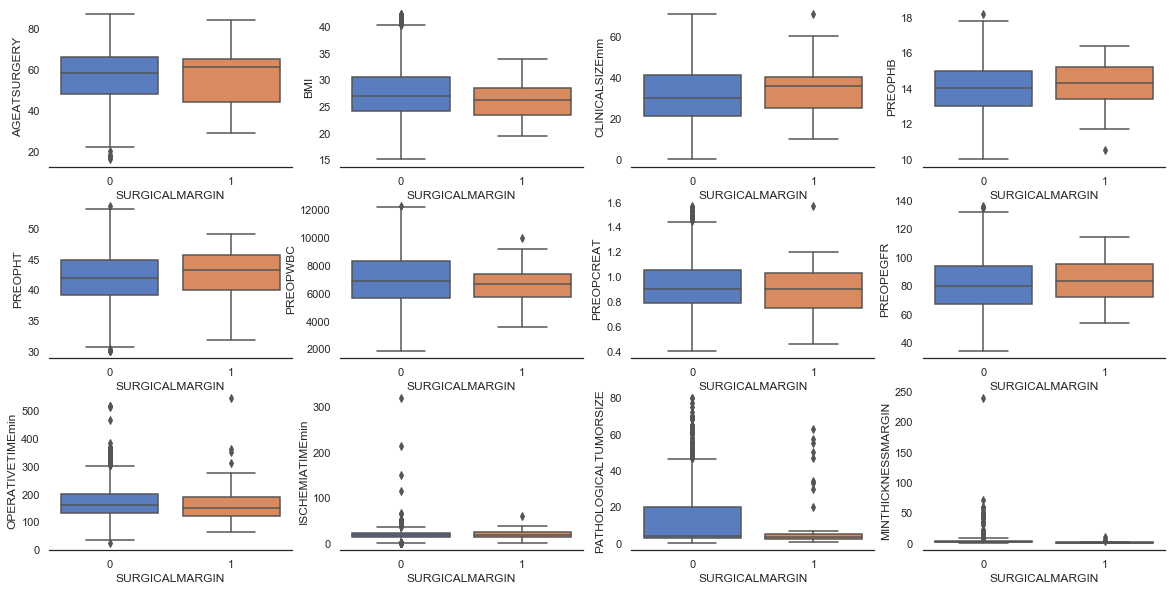

In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(3, 4, figsize=(20, 10))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[2, 0])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[2, 1])
sns.boxplot(data = df, y = 'PATHOLOGICALTUMORSIZE', x = target, ax=axes[2, 2])
sns.boxplot(data = df, y = 'MINTHICKNESSMARGIN', x = target, ax=axes[2, 3])

In [113]:
# Check the number of outliers
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT',
              'PREOPWBC','PREOPCREAT','PREOPEGFR','OPERATIVETIMEmin',
              'ISCHEMIATIMEmin','PATHOLOGICALTUMORSIZE','MINTHICKNESSMARGIN']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    print('{:<22s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])),
          'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))

BMI                      26    0 UL-LL 40.26-14.52
CLINICALSIZEmm            9    0 UL-LL 69.50--6.50
PREOPHB                   1    9 UL-LL 17.85-10.25
PREOPHT                   1    5 UL-LL 53.70-30.50
PREOPWBC                  5    1 UL-LL 12100.00-1860.00
PREOPCREAT               25    1 UL-LL 1.44-0.40
PREOPEGFR                 3    0 UL-LL 133.62-27.02
OPERATIVETIMEmin         48    1 UL-LL 299.50-31.50
ISCHEMIATIMEmin          53   79 UL-LL 36.50-0.50
PATHOLOGICALTUMORSIZE    77    0 UL-LL 46.10--23.50
MINTHICKNESSMARGIN       79    0 UL-LL 8.50--3.50


In [114]:
#replacing inaccurate readings with missing values
clean_cols = ['OPERATIVETIMEmin','ISCHEMIATIMEmin','PATHOLOGICALTUMORSIZE','MINTHICKNESSMARGIN']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [115]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,SURGICALMARGIN
count,1316.000000,1235.000000,1279.000000,1263.000000,1285.000000,1284.000000,1144.000000,1306.000000,1057.000000,1173.000000,1298.000000,1244.000000,1232.000000,1284.000000,1303.000000,811.000000,1318.000000
mean,56.802432,27.425265,30.174668,1.167063,14.048918,41.937305,7041.798077,0.926677,80.839026,1.917306,1.047766,163.424437,18.693718,187.233645,10.687068,2.144760,0.036419
std,12.723340,4.751848,13.475919,1.701530,1.382401,4.115964,1814.573085,0.204010,18.604322,0.830816,0.256058,45.930707,6.334002,221.474172,12.397086,1.761994,0.187401
min,17.000000,15.100000,0.000000,0.000000,10.000000,30.000000,1840.000000,0.460000,34.000000,1.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.170000,20.000000,0.000000,13.100000,39.300000,5600.000000,0.780000,67.000000,1.000000,1.000000,128.000000,14.000000,50.000000,2.500000,1.000000,0.000000
50%,57.000000,26.790000,28.000000,1.000000,14.100000,42.100000,6895.000000,0.900000,80.190000,2.000000,1.000000,160.000000,18.000000,100.000000,4.000000,1.500000,0.000000
75%,66.000000,30.160000,40.000000,2.000000,15.100000,45.000000,8200.000000,1.050000,93.590000,3.000000,1.000000,190.000000,23.000000,200.000000,17.500000,3.000000,0.000000
max,87.000000,42.400000,71.000000,19.000000,18.200000,53.700000,12300.000000,1.570000,135.000000,3.000000,3.000000,297.000000,36.000000,2000.000000,46.000000,8.000000,1.000000


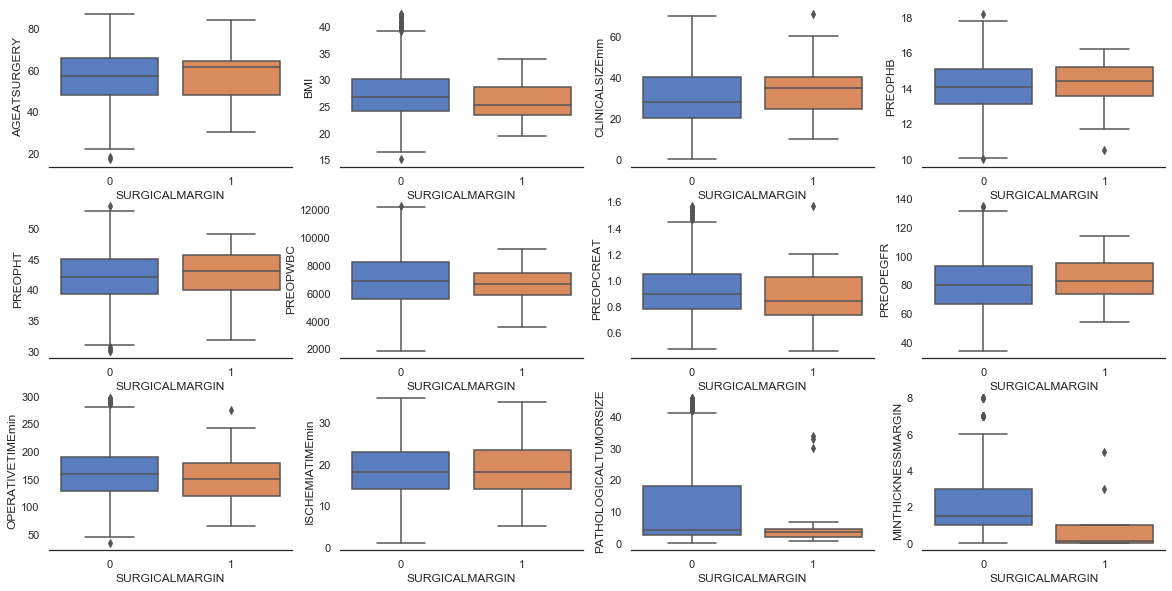

In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(3, 4, figsize=(20, 10))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[2, 0])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[2, 1])
sns.boxplot(data = df, y = 'PATHOLOGICALTUMORSIZE', x = target, ax=axes[2, 2])
sns.boxplot(data = df, y = 'MINTHICKNESSMARGIN', x = target, ax=axes[2, 3])

In [117]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001517
MARITALSTATUS            0.107739
                           ...   
CLAVIENGRADE             0.000000
PATHOLOGICALTUMORSIZE    0.011381
MINTHICKNESSMARGIN       0.384674
MULITIFOCALITY           0.021244
SURGICALMARGIN           0.000000
Length: 70, dtype: float64

In [118]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [119]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 1318
Records with >=25% missing data 1294
Records to be dropped 24


In [120]:
# Chekc the number of missing values for each variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001546
MARITALSTATUS            0.093509
                           ...   
PATHOLOGICALTUMORSIZE    0.011592
MINTHICKNESSMARGIN       0.386399
MULITIFOCALITY           0.021638
SURGICALMARGIN           0.000000
Missing                  0.000000
Length: 71, dtype: float64

In [121]:
#removing patients with more than 70% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [122]:
df[df.columns[df.isnull().mean() <= 0.15]].isnull().mean()

PATIENTNUMBER            0.000000
CENTERCODE               0.000000
GENDER                   0.000000
AGEATSURGERY             0.001546
MARITALSTATUS            0.093509
                           ...   
CLAVIENGRADE             0.000000
PATHOLOGICALTUMORSIZE    0.011592
MULITIFOCALITY           0.021638
SURGICALMARGIN           0.000000
Missing                  0.000000
Length: 66, dtype: float64

In [123]:
df = df[df.columns[df.isnull().mean() <= 0.15]]

In [124]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [125]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [126]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1317
Data columns (total 66 columns):
PATIENTNUMBER                         1294 non-null object
CENTERCODE                            1294 non-null object
GENDER                                1294 non-null object
AGEATSURGERY                          1294 non-null float64
MARITALSTATUS                         1294 non-null object
RACE                                  1294 non-null object
EDUCATION                             1294 non-null object
BMI                                   1294 non-null float64
CLINICALSIZEmm                        1294 non-null float64
CHARLSONSCORE                         1294 non-null float64
SYMPTOMS                              1294 non-null object
SOLITARYKIDNEY                        1294 non-null object
BILATERALITYOFTUMOR                   1294 non-null object
SIDEOFTUMOR                           1294 non-null object
SIDEOFSURGERY                         1294 non-null object
FACE

In [127]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 2,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3,
 'ACCESS': 3,
 'DAVINCIMODEL': 4,
 'ROBOTICSARMS': 3,
 'ASSISTENTTROCARS': 3,
 'DUALCONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMPARTERY': 3,
 'SELECTIVEARTERIALCLAMPING': 3,
 'CLAMPVEIN': 4,
 'EARLYUNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'INNERRENORRHAPHY': 3,
 'OUTERRENORRHAPHY': 3,
 'UCSREPAIR': 3,
 'HAEMOSTATICAGENTS': 3,
 'LYMPHNODEDISSECTIONLND': 3,
 'INTRAOPTRANSUFUSION': 4,
 'INTRAOPCOMPLICATIONS': 7,
 'SURGICALCOMPLIC

In [128]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [129]:
# list of features with object type
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


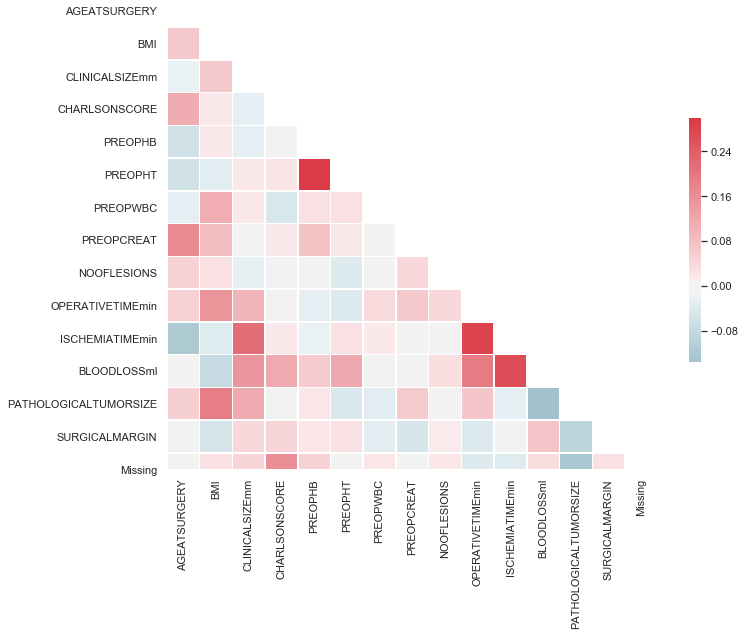

In [130]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [131]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1317
Data columns (total 66 columns):
PATIENTNUMBER                         1294 non-null object
CENTERCODE                            1294 non-null category
GENDER                                1294 non-null category
AGEATSURGERY                          1294 non-null float64
MARITALSTATUS                         1294 non-null category
RACE                                  1294 non-null category
EDUCATION                             1294 non-null category
BMI                                   1294 non-null float64
CLINICALSIZEmm                        1294 non-null float64
CHARLSONSCORE                         1294 non-null float64
SYMPTOMS                              1294 non-null category
SOLITARYKIDNEY                        1294 non-null category
BILATERALITYOFTUMOR                   1294 non-null category
SIDEOFTUMOR                           1294 non-null category
SIDEOFSURGERY                         1294 no

In [132]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting 30 day complications: {}".format(len(df)))

Number records for predicting 30 day complications: 1294


In [133]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [134]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [135]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Left': 0, 'Right': 1},
 'FACE': {'Anterior': 0, 

In [136]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [137]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,INTRAOPCOMPLICATIONS,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,CLAVIENGRADE,PATHOLOGICALTUMORSIZE,MULITIFOCALITY,SURGICALMARGIN,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,0,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,2,3,1,2,1,180.0,3,0,2,2,1,2,2,2,25.0,2,2,2,100.0,3,6,4,0,1,3.5,0,0,0.0
1,11PAT000166,1,1,56.0,1,1,2,23.36,30.0,0.0,0,1,1,1,0,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,2,3,1,2,1,160.0,3,0,1,2,1,1,1,1,20.0,1,1,1,75.0,3,6,0,0,1,3.0,0,0,3.0
2,15PAT000088,15,0,44.0,3,4,2,29.30,57.0,0.0,1,1,1,1,0,2,2,13.5,41.3,6300.0,0.83,3,1,2,2,1,0,2,1,2,0,0,3,1,1,1,1,1.0,2,2,0,0,1,108.0,3,0,1,2,1,1,2,2,23.0,1,1,1,187.0,3,6,5,0,1,42.0,0,0,2.0
3,11PAT000124,1,0,63.0,1,1,2,32.02,30.0,1.0,0,1,1,3,1,2,0,12.4,36.5,9500.0,1.10,1,2,2,1,1,0,2,1,2,0,2,3,1,1,1,1,1.0,2,3,1,2,1,120.0,3,0,1,2,1,1,2,2,22.0,1,1,1,200.0,3,6,5,0,0,3.4,0,0,3.0
4,15PAT000080,15,1,63.0,3,4,2,25.08,37.0,2.0,0,1,1,3,1,2,4,14.4,42.7,5500.0,1.01,3,1,0,2,1,1,1,1,2,1,0,3,1,1,1,1,1.0,2,2,0,0,1,178.0,3,0,1,2,1,1,2,2,30.0,1,1,1,100.0,3,6,5,0,1,2.5,0,0,1.0


### Create Stats for dataset

In [138]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 57.0 [48.0-66.0]
BMI 27.0 [24.3-30.0]
CLINICALSIZEmm 30.0 [21.0-39.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.1-15.0]
PREOPHT 42.0 [39.5-45.0]
PREOPWBC 7042.0 [5800.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]
OPERATIVETIMEmin 160.0 [130.0-187.0]
ISCHEMIATIMEmin 18.0 [14.5-22.0]
BLOODLOSSml 100.0 [50.0-200.0]
PATHOLOGICALTUMORSIZE 4.0 [2.5-18.0]


In [139]:
for i in df_codes.columns:
    if i in cat_col:
        print(pd.DataFrame(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts()))

          CENTERCODE
GCIEYK6L         360
63DCGHNW         175
4UPDM0XB         146
4M49I4D5         131
VNO3BPES          95
08ZMCILJ          67
U5WT3NOY          52
0VZRZWAI          46
QRJWT5QR          43
WGC7XYXZ          34
RETM03Y8          29
57T3OUKU          25
3QWOG020          25
GQHLD5Q4          24
FWL0MH42          15
VRVRQ639          14
39HIP3LQ           7
94ISQMHX           6
        GENDER
Male       846
Female     448
          MARITALSTATUS
Married             979
NA                  121
Single              115
Widowed              41
Divorced             38
                 RACE
White/Caucasian   683
Others            272
Mongoloid/Asian   171
NA                138
Black              30
                  EDUCATION
Not Provided            545
Graduate                277
Upto High School        175
NA                      172
Post Graduate           125
                   SYMPTOMS
Absent                 1025
Local Symptoms          220
NA                       29


In [140]:
#traget_stats = pd.merge(df_codes[['PATIENTNUMBER','POSTOP_COMPLICATIONS']],
#                        df_ori[['PATIENTNUMBER','SURGICALCOMPLICATIONS','NONSURGICALCOMPLICATIONS','CLAVIENGRADE','LENGTHOFSTAYdays']], 
#                        left_on='PATIENTNUMBER', 
#                        right_on='PATIENTNUMBER').copy()

In [141]:
#traget_stats['CLAVIENGRADE'].value_counts()

In [142]:
#traget_stats[traget_stats['POSTOP_COMPLICATIONS']==1]['CLAVIENGRADE'].value_counts()

In [143]:
#sum(traget_stats['LENGTHOFSTAYdays']>4)

In [144]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['SURGICALMARGIN'])/len(df_codes)*100))

Number of patients 1294
% of patients with complications 3.71%


In [145]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['SURGICALMARGIN'])

In [146]:
# Percentage of complications in trainset
train['SURGICALMARGIN'].sum()/len(train)

0.03756906077348066

In [147]:
# Percentage of complications in testset
test['SURGICALMARGIN'].sum()/len(test)

0.03598971722365039

In [148]:
# define data output path
data_path = 'H:/RediMinds/VCQI/SURGICALMARGIN/Postoperative/'
import os
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [149]:
df_codes.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
df_codes.to_csv(data_path+"VCQI_clean_SURGICALMARGIN.csv",index=False)

In [150]:
patient_list_train = train['PATIENTNUMBER'].tolist()
patient_list_test = test['PATIENTNUMBER'].tolist()
from joblib import dump
dump(patient_list_train, output_path + 'patient_list_train.joblib')
dump(patient_list_test, output_path + 'patient_list_test.joblib')

['output/models/patient_list_test.joblib']

In [151]:
# Save train and test dataset

train.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
test.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
train.to_csv(data_path+"VCQI_clean_train_SURGICALMARGIN.csv",index=False)
test.to_csv(data_path+"VCQI_clean_test_SURGICALMARGIN.csv",index=False)

C:\Users\anubhav\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'cat_col_SURGICALMARGIN', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)